# Lambda memory equations

Slightly different equations for the following protocols will be derived.

In [1]:
from fast import *
from fast.symbolic import hamiltonian
from matplotlib import pyplot as plt
from sympy import solve
from sympy import exp, I
%matplotlib inline
init_printing()

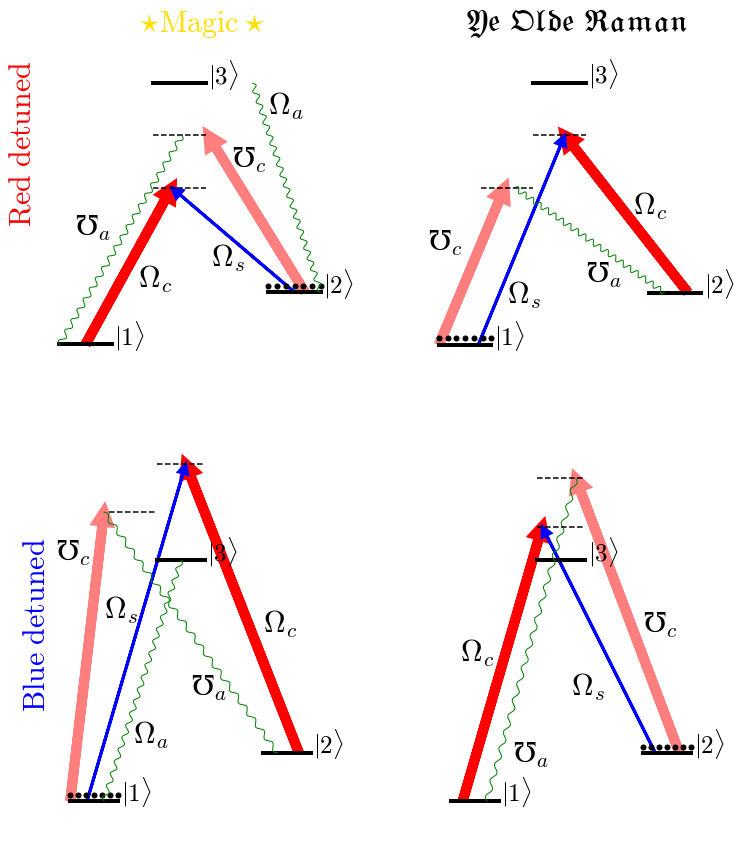

In [2]:
fig, axes = plt.subplots(2, 2, figsize=(12.5, 15))
om21 = 1
om31 = 5
om32 = 4
p1 = [0, 0]
p2 = [4, om21]
p3 = [1.8, om31]

framexmax = 5; frameymax = 7; frameymax2 = 6

for i in range(2):
    for j in range(2):
        axij = axes[i, j]; axij.set_aspect("equal")
        if (i,j) in [(0, 0), (1, 1)]:
            draw_state(axij, p1, text=r"$|1\rangle$", l=1.0, alignment='right',
                       label_displacement=0.05, fontsize=25, linewidth=4.0)
            draw_state(axij, p2, text=r"$|2\rangle$", l=1.0, alignment='right',
                       label_displacement=0.05, fontsize=25, linewidth=4.0, atoms=7)
        else:
            draw_state(axij, p1, text=r"$|1\rangle$", l=1.0, alignment='right',
                       label_displacement=0.05, fontsize=25, linewidth=4.0, atoms=7)
            draw_state(axij, p2, text=r"$|2\rangle$", l=1.0, alignment='right',
                       label_displacement=0.05, fontsize=25, linewidth=4.0)
        
        draw_state(axij, p3, text=r"$|3\rangle$", l=1.0, alignment='right',
                   label_displacement=0.05, fontsize=25, linewidth=4.0)
        if i == 0:
            axij.plot([0, 0, framexmax],[0,frameymax2, frameymax2], "k-", alpha=0.0)
        else:
            axij.plot([0, 0, framexmax],[0,frameymax, frameymax], "k-", alpha=0.0)
        axes[i, j].axis("off")

fs = 30
#axes[0, 0].set_title(r"$\star\mathrm{Magic}\star$", fontsize=fs, color=(255/255.,223/255.,0/255.))
#axes[0, 1].set_title(r"$\mathfrak{Ye \ Olde \ Raman}$", fontsize=fs)
#axes[0, 0].set_ylabel(r"$\mathrm{Red \ detuned}$", fontsize=fs, color="r")
#axes[1, 0].set_ylabel(r"$\mathrm{Blue \ detuned}$", fontsize=fs, color="b")
axes[0, 0].text(1, 6, r"$\star\mathrm{Magic}\star$", color=(255/255.,223/255.,0/255.), fontsize=fs)
axes[0, 1].text(0, 6, r"$\mathfrak{Ye \ Olde \ Raman}$", fontsize=fs)
axes[0, 0].text(-1.5, 5, r"$\mathrm{Red \ detuned}$", fontsize=fs, rotation=90, color="r")
axes[1, 0].text(-1.5, 5, r"$\mathrm{Blue \ detuned}$", fontsize=fs, rotation=90, color="b")

l = 0.5
###################################################################################
# Red Magic
delta = -2*om21; disp = 0.25; disp2 = -0.5
excitation(axes[0, 0], [p1[0]+0.25-disp,p1[1]],[p3[0]+0.10-disp,p3[1]+delta],
           fc="r", ec="r",linewidth=10.0, head_width=0.2, head_length=0.2)
excitation(axes[0, 0], [p2[0]+0.25-disp,p2[1]],[p3[0]+0.10-disp,p3[1]+delta],
           fc="b", ec="b",linewidth=3.0, head_width=0.2, head_length=0.2)

excitation(axes[0, 0], [p2[0]+p1[0]+0.25+disp-0.3,p2[1]+p1[1]],[p2[0]-p3[0]-0.10+disp,p2[1]+p3[1]+delta],
           fc="w", ec="r",linewidth=10.0, head_width=0.2, head_length=0.2, alpha=0.5)

decay(axes[0,0], [p2[0]-p3[0]-0.10+disp+disp2,p2[1]+p3[1]+delta],
              [ p1[0]+disp2, p1[1]], 0.05,20.0,color="g",linewidth=1.0)
decay(axes[0,0],[p2[0]+0.5, p2[1]],
                [p2[0]-0.8, p3[1]], 0.05,20.0,color="g",linewidth=1.0)

axes[0, 0].plot( [p3[0]-l, p3[0]+l], [p3[1]+delta, p3[1]+delta], "k--")
axes[0, 0].plot( [p3[0]-l, p3[0]+l], [p3[1]+delta*0.5, p3[1]+delta*0.5], "k--")
axes[0, 0].text(2.4,1.5,r"$\Omega_s$", fontsize=fs)
axes[0, 0].text(1.0,1.1,r"$\Omega_c$", fontsize=fs)
axes[0, 0].text(-0.2,2.1,r"$\mho_a$", fontsize=fs)
axes[0, 0].text(2.8,3.4,r"$\mho_c$", fontsize=fs)
axes[0, 0].text(3.5,4.4,r"$\Omega_a$", fontsize=fs)

###################################################################################
# Red Normal
delta = -om21; disp = -0; disp2 = -0.2
excitation(axes[0, 1], [p2[0]+0.25-disp,p2[1]],[p3[0]+0.10-disp,p3[1]+delta],
           fc="r", ec="r",linewidth=10.0, head_width=0.2, head_length=0.2)
excitation(axes[0, 1], [p1[0]+0.25-disp,p1[1]],[p3[0]+0.10-disp,p3[1]+delta],
           fc="b", ec="b",linewidth=3.0, head_width=0.2, head_length=0.2)
disp = 0.75
excitation(axes[0, 1], [p1[0]+0.25-disp,p1[1]],[p3[0]+0.10-disp-0.4,p3[1]+delta-om21],
           fc="w", ec="r",linewidth=10.0, head_width=0.2, head_length=0.2, alpha=0.5)

decay(axes[0, 1], [p3[0]+0.10-disp-0.2,p3[1]+delta-om21],
              [ p2[0]+disp2, p2[1]], 0.05,20.0,color="g",linewidth=1.0)

axes[0, 1].plot( [p3[0]-l, p3[0]+l], [p3[1]+delta, p3[1]+delta], "k--")
axes[0, 1].plot( [p3[0]-l-1, p3[0]+l-1], [p3[1]+delta-om21, p3[1]+delta-om21], "k--")
axes[0, 1].text(0.8,0.8,r"$\Omega_s$", fontsize=fs)
axes[0, 1].text(3.2,2.5,r"$\Omega_c$", fontsize=fs)
axes[0, 1].text(-0.7,1.8,r"$\mho_c$", fontsize=fs)
axes[0, 1].text(2.3,1.2,r"$\mho_a$", fontsize=fs)
###################################################################################
# Blue Magic
delta = 2*om21; disp = -0; disp2 = -0.2
excitation(axes[1, 0], [p2[0]+0.25-disp,p2[1]],[p3[0]+0.10-disp,p3[1]+delta],
           fc="r", ec="r",linewidth=10.0, head_width=0.2, head_length=0.2)
excitation(axes[1, 0], [p1[0]+0.25-disp -0.4,p1[1]],[p3[0]+0.10-disp,p3[1]+delta],
           fc="b", ec="b",linewidth=3.0, head_width=0.2, head_length=0.2)
disp = 0.75
pvir = [0.2, p3[1]+delta*0.5]

excitation(axes[1, 0], [p1[0]+0.25-disp,p1[1]],[pvir[0], pvir[1]],
           fc="w", ec="r",linewidth=10.0, head_width=0.2, head_length=0.2, alpha=0.5)

decay(axes[1, 0], [pvir[0], pvir[1]],
              [ p2[0]+disp2, p2[1]], 0.05,20.0,color="g",linewidth=1.0)
decay(axes[1, 0], [p1[0]+0.2, p1[1]],
                  [p3[0], p3[1]], 0.05,20.0,color="g",linewidth=1.0)

axes[1, 0].plot( [p3[0]-l, p3[0]+l], [p3[1]+delta, p3[1]+delta], "k--")
axes[1, 0].plot( [p3[0]-l-1, p3[0]+l-1], [p3[1]+delta*0.5, p3[1]+delta*0.5], "k--")

axes[1, 0].text(0.2,3.8,r"$\Omega_s$", fontsize=fs)
axes[1, 0].text(3.5,3.5,r"$\Omega_c$", fontsize=fs)
axes[1, 0].text(-0.8,5.0,r"$\mho_c$", fontsize=fs)
axes[1, 0].text(2.0,2.2,r"$\mho_a$", fontsize=fs)
axes[1, 0].text(0.8,1.2,r"$\Omega_a$", fontsize=fs)

###################################################################################
# Blue Normal
delta = 0.7; disp = 0.5; disp2 = -0.0
excitation(axes[1, 1], [p1[0]+0.25-disp,p1[1]],[p3[0]+0.10-disp,p3[1]+delta],
           fc="r", ec="r",linewidth=10.0, head_width=0.2, head_length=0.2)
excitation(axes[1, 1], [p2[0]+0.25-disp,p2[1]],[p3[0]+0.10-disp,p3[1]+delta],
           fc="b", ec="b",linewidth=3.0, head_width=0.2, head_length=0.2)

excitation(axes[1, 1], [p2[0]+p1[0]+0.25+disp2,p2[1]+p1[1]],[p2[0]-p3[0]-0.10+disp2,p2[1]+p3[1]+delta],
           fc="w", ec="r",linewidth=10.0, head_width=0.2, head_length=0.2, alpha=0.5)

decay(axes[1,1], [p2[0]-p3[0]-0.10+disp2,p2[1]+p3[1]+delta],
              [ p1[0]+disp2+0.25, p1[1]], 0.05,20.0,color="g",linewidth=1.0)


axes[1, 1].plot( [p3[0]-l, p3[0]+l], [p3[1]+delta, p3[1]+delta], "k--")
axes[1, 1].plot( [p3[0]-l, p3[0]+l], [p3[1]+delta+om21, p3[1]+delta+om21], "k--")
axes[1, 1].text(0.8,0.8,r"$\mho_a$", fontsize=fs)
axes[1, 1].text(3.5,3.5,r"$\mho_c$", fontsize=fs)
axes[1, 1].text(-0.3,2.9,r"$\Omega_c$", fontsize=fs)
axes[1, 1].text(2.0,2.2,r"$\Omega_s$", fontsize=fs)

plt.savefig("lambda_diagrams.png", bbox_inches="tight")
plt.savefig("lambda_diagrams.pdf", bbox_inches="tight")

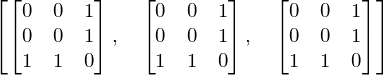

In [3]:
from sympy import zeros, pi, pprint, symbols, I, diff
Ne = 3
Nl = 3
Ep, omega_laser = define_laser_variables(Nl)
epsilonp = [polarization_vector(0, -pi/2, 0, 0, 1) for l in range(Nl)]
delta1, delta2 = symbols("delta1 delta2", real=True)
detuning_knob = [delta1, delta2]

xi = [zeros(Ne, Ne) for l in range(Nl)]
coup = [[(2, 0), (2, 1)], [(2, 0), (2, 1)], [(2, 0), (2, 1)]]
# coup = [[(2, 0), (2, 1)], [(2, 0), (2, 1)], [(2, 0)]]
# coup = [[(2, 0)], [(2, 1)], [(2, 1)]]


for l in range(Nl):
    for pair in coup[l]:
        xi[l][pair[0], pair[1]] = 1
        xi[l][pair[1], pair[0]] = 1

xi

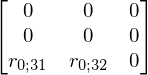

In [4]:
rm = define_r_components(Ne, xi, explicitly_hermitian=True,
                         helicity=True, p=-1)
rm = helicity_to_cartesian(rm)
rm[2]

In [5]:
t = symbols("t", real=True)
c, ct, theta = define_psi_coefficients(Ne)
thetat = [theta[i]*t for i in range(Ne)]
thetat

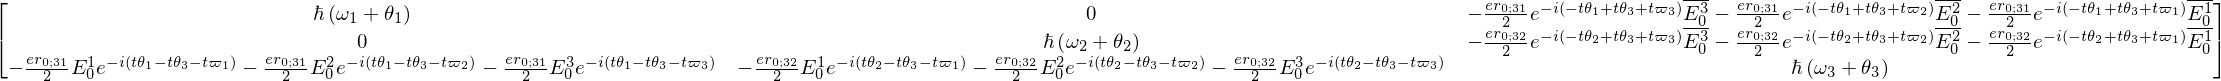

In [6]:
omega_level, omega, gamma = define_frequencies(Ne, True)

H = hamiltonian(Ep, epsilonp, detuning_knob, rm, omega_level, omega_laser,
                xi, RWA=True, RF=thetat)
H

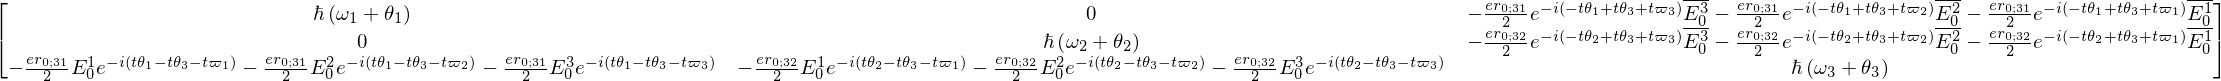

In [7]:
omega_level, omega, gamma = define_frequencies(Ne, True)

H = hamiltonian(Ep, epsilonp, detuning_knob, rm, omega_level, omega_laser,
                xi, RWA=True, RF=thetat)

H

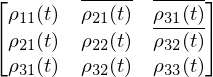

In [8]:
hbar, e = symbols("hbar, e", positive=True)
t, delta = symbols("t, delta", real=True)
Oms = symbols(r"\Omega_s")
Omc = symbols(r"\Omega_c")
Oma = symbols(r"\Omega_a")
Omsp = symbols(r"\mho_s")
Omcp = symbols(r"\mho_c")
Omap = symbols(r"\mho_a")
rho = define_density_matrix(Ne, explicitly_hermitian=True, variables=[t])
rho

We build the interpretation of this general naming scheme into whichever memory protocol we are interested in.

In [9]:
magic = True
# magic = False
red = True
# red = False
if (magic and red) or (not magic and not red):
    print "Naming scheme 1"
    ss_lin = {rho[0, 0]: 0, rho[1, 1]:1, rho[2, 2]: 0}
    ss_om = {rm[2][2, 0]*Ep[0]: hbar*Omc/e,
             rm[2][2, 1]*Ep[0]: hbar*Omcp/e,
             rm[2][2, 1]*Ep[1]: hbar*Oms/e,
             rm[2][2, 0]*Ep[1]: hbar*Omsp/e,
             rm[2][2, 1]*Ep[2]: hbar*Oma/e,
             rm[2][2, 0]*Ep[2]: hbar*Omap/e}

    ss_delta = {omega_laser[0]: delta1 + omega_level[2]-omega_level[0],
                omega_laser[1]: delta2 + omega_level[2]-omega_level[1]}
    ss_delta.update({omega_laser[2]: ss_delta[omega_laser[0]] + omega_level[1]-omega_level[0]})

else:
    print "Naming scheme 2"
    ss_lin = {rho[0, 0]: 1, rho[1, 1]:0, rho[2, 2]: 0}
    ss_om = {rm[2][2, 0]*Ep[0]: hbar*Oms/e,
             rm[2][2, 1]*Ep[0]: hbar*Omsp/e,
             rm[2][2, 1]*Ep[1]: hbar*Omc/e,
             rm[2][2, 0]*Ep[1]: hbar*Omcp/e,
             rm[2][2, 0]*Ep[2]: hbar*Oma/e,
             rm[2][2, 1]*Ep[2]: hbar*Omap/e}

    ss_delta = {omega_laser[0]: delta1 + omega_level[2]-omega_level[0],
                omega_laser[1]: delta2 + omega_level[2]-omega_level[1]}
    ss_delta.update({omega_laser[2]: ss_delta[omega_laser[1]] - omega_level[1]+omega_level[0]})

ss_delta0 = {delta1: delta, delta2: delta}
ss_om_con = {key.conjugate() : ss_om[key].conjugate() for key in ss_om}
ss_om.update(ss_om_con)

Naming scheme 1


We rename the couplings in the Hamiltonian

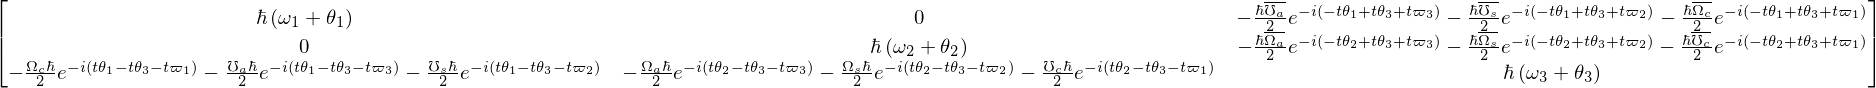

In [10]:
H = H.subs(ss_om)
H

We calculate the full equations.

In [11]:
gamma[1, 0] = 0
gamma[0, 1] = 0

rhs = I/hbar*(rho*H-H*rho) + lindblad_terms(gamma, rho, Ne)

We select only the equations for the coherences

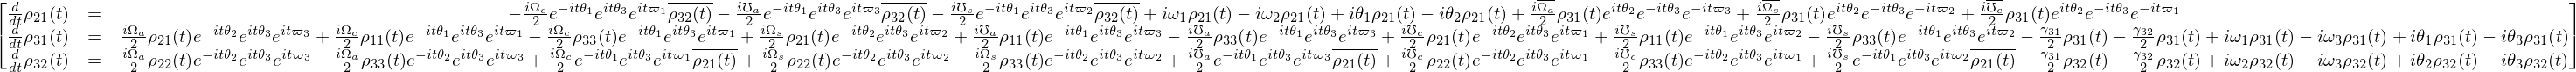

In [12]:
rhs = Matrix(sum([sum([[rhs[i, j]] for j in range(i)],[]) for i in range(Ne)], []))
lhs = Matrix(sum([sum([[diff(rho[i, j],t)] for j in range(i)],[]) for i in range(Ne)], []))

eqsign = symbols("=")
eqs = Matrix([[lhs[i], eqsign, rhs[i]] for i in range((Ne**2-Ne)/2)])
eqs = eqs.expand()
eqs

In [13]:
epsilon = symbols("epsilon", positive=True)
ss_lin2 = {rho[1, 0]: rho[1, 0]*epsilon,
           rho[2, 0]: rho[2, 0]*epsilon,
           rho[2, 1]: rho[2, 1]*epsilon,
           Oms: Oms*epsilon}
ss_lin.update(ss_lin2)
ss_lin

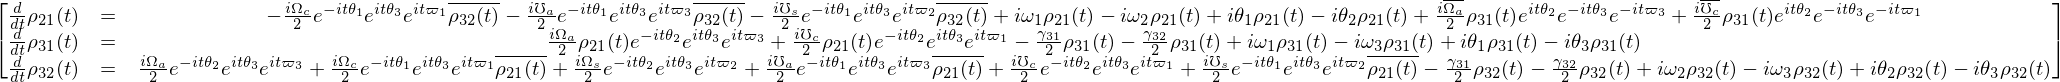

In [14]:
eqs_lin = eqs.subs(ss_lin)
eqs_lin = eqs_lin.subs({epsilon**2: 0})
eqs_lin = eqs_lin.subs({epsilon: 1})
eqs_lin = Matrix([eqs_lin[0, :], eqs_lin[1, :], eqs_lin[2, :]])
eqs_lin

In [15]:
eqs_phase = [-theta[0]+theta[2]+omega_laser[0],
             -theta[1]+theta[2]+omega_laser[1],]

theta_sol = solve(eqs_phase, theta)
theta_sol, ss_delta

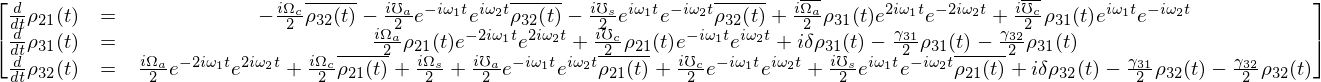

In [16]:
eqs_lin_new = eqs_lin.subs(theta_sol).subs(ss_delta).subs(ss_delta0).expand()
eqs_lin_new

In [17]:
ss_slow = {Oma*exp(-2*I*omega_level[0]*t): 0,
           Omap*exp(-I*omega_level[0]*t): 0,
           Omsp*exp( I*omega_level[0]*t): 0}

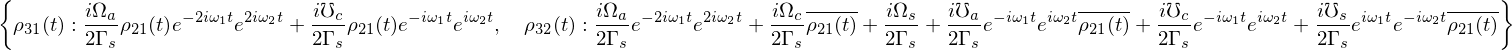

In [18]:
Gamma_s = symbols("Gamma_s")
sol_ad=solve([eqs_lin_new[1, 2], eqs_lin_new[2, 2]], [rho[2, 0], rho[2, 1]])
sol_ad[rho[2,0]]=sol_ad[rho[2,0]].subs({-2*I*delta+gamma[2,0]+gamma[2,1]:2*Gamma_s}).expand()
sol_ad[rho[2,1]]=sol_ad[rho[2,1]].subs({-2*I*delta+gamma[2,0]+gamma[2,1]:2*Gamma_s}).expand()
sol_ad

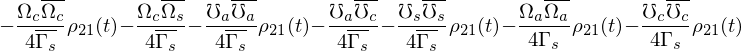

In [19]:
eq_s=eqs_lin_new[0, 2].subs(sol_ad).expand()
eq_s = eq_s.subs({exp( I*omega_level[0]*t)*exp(-I*omega_level[1]*t): 0,
                  exp(-I*omega_level[0]*t)*exp( I*omega_level[1]*t): 0})
eq_s

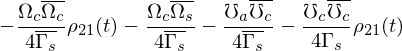

In [20]:
epsilon = symbols("epsilon", real=True)
ss_lin2 = {Oms: Oms*epsilon, Omsp: Omsp*epsilon,
           Oma: Oma*epsilon, Omap: Omap*epsilon}
eqs_f = eq_s.subs(ss_lin2).subs({epsilon**2: 0}).subs({epsilon: 1})
eqs_f